<a href="https://colab.research.google.com/github/Tharun2331/Mnist-Classifier/blob/master/mnsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
tf.keras.__version__

'2.6.0'

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns


In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test[0]

7

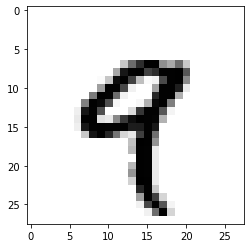

In [ ]:
img = X_train_full[4]
plt.imshow(img,cmap="binary")
plt.show()


In [ ]:
img.max()

255

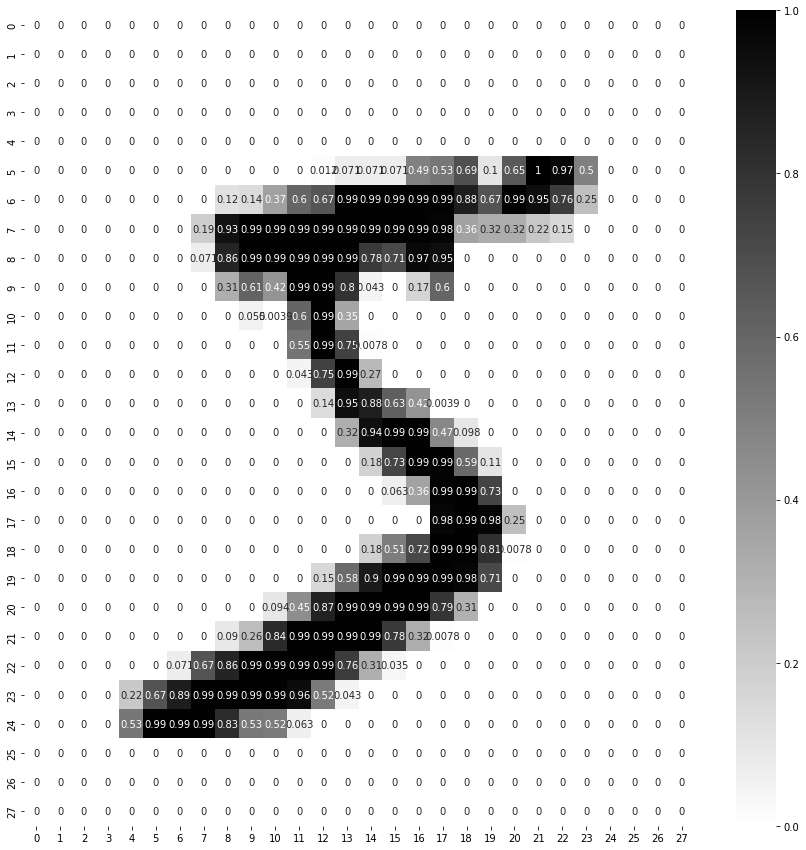

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(img/255,annot=True,cmap="binary")

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] /255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test /255.

In [ ]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
          tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
          tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
          tf.keras.layers.Dense(10,activation="softmax",name="outputLayer"),
]

In [ ]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [ ]:
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# firstlayer * secondlayer + bias

784*300 + 300, 300*100 + 100, 100*10 + 10

(235500, 30100, 1010)

In [ ]:
np.sum((235500, 30100, 1010))

266610

In [ ]:
model_clf.layers[3].name

'outputLayer'

In [ ]:
weights, bias =model_clf.layers[1].get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
bias.shape

(300,)

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER="SGD"
METRICS=["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [ ]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.5764 - accuracy: 0.8566 - val_loss: 0.2978 - val_accuracy: 0.9206
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2823 - accuracy: 0.9194 - val_loss: 0.2310 - val_accuracy: 0.9376
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2294 - accuracy: 0.9350 - val_loss: 0.1955 - val_accuracy: 0.9466
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1947 - accuracy: 0.9443 - val_loss: 0.1708 - val_accuracy: 0.9528
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1695 - accuracy: 0.9520 - val_loss: 0.1532 - val_accuracy: 0.9570
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1506 - accuracy: 0.9572 - val_loss: 0.1379 - val_accuracy: 0.9624
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1349 - accuracy: 0.9619 - val_loss: 0.1286 - val_accuracy:

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.576395,0.856564,0.297821,0.9206
1,0.282333,0.919400,0.230975,0.9376
2,0.229404,0.934982,0.195530,0.9466
3,0.194737,0.944345,0.170778,0.9528
4,0.169527,0.952000,0.153162,0.9570
5,0.150593,0.957218,0.137920,0.9624
6,0.134873,0.961909,0.128623,0.9638
7,0.121967,0.965600,0.119962,0.9686
8,0.111348,0.968618,0.112698,0.9690
9,0.101865,0.971655,0.109145,0.9706


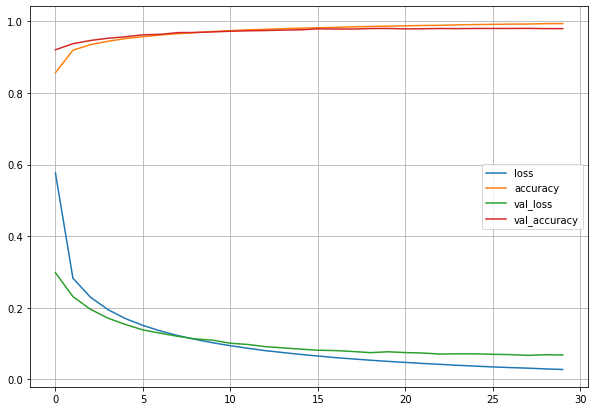

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [ ]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9782


[0.07517698407173157, 0.9782000184059143]

In [ ]:
x_new = X_test[:3]
y_prob = model_clf.predict(x_new)

y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [ ]:
y_prob.shape

(3, 10)

In [ ]:
y_pred = np.argmax(y_prob,axis=-1)
y_pred

array([7, 2, 1])

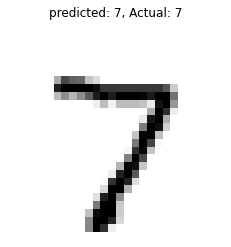

------------------------------------------------------------


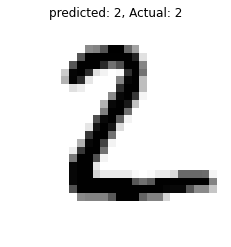

------------------------------------------------------------


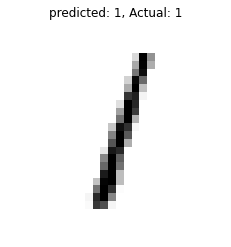

------------------------------------------------------------


In [ ]:
for img_array, pred, actual in zip(x_new, y_pred, y_test[:3]):
  plt.imshow(img_array, cmap="binary")
  plt.title(f"predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)

In [ ]:
model_clf.save("model.m5")

INFO:tensorflow:Assets written to: model.m5/assets
